In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import shutil
import random
import glob
import warnings
warnings.simplefilter(action='ignore', category='FutureWarinig')
%matplotlib inline

In [8]:
# To rename each of the files

#os.chdir('F:/Jupyter_Experiments/ML/hamburger')

#for num, file in enumerate(os.listdir(path)):
#    name = "hamburger_{}.jpg".format(num)
#    os.rename(file, name)'''
    
#os.chdir('F:/Jupyter_Experiments/ML/pizza')

#for num, file in enumerate(os.listdir(path)):
#    name = "pizza_{}.jpg".format(num)
#    os.rename(file, name)
#   
#os.chdir('F:/Jupyter_Experiments/ML/takoyaki')

#for num, file in enumerate(os.listdir(path)):
#    name = "takoyaki_{}.jpg".format(num)
#    os.rename(file, name)

In [9]:
os.chdir('C:/Jupyter_Experiments/ML')
#print(os.getcwd())

#for num, file in enumerate(os.listdir(path)):
#    name = "hamburger_{}.jpg".format(num)
#    os.rename(file, name)

#separate the data into train, test and validate
#if os.path.isdir('F:/Jupyter_Experiments/ML/train/hamburger') is False:
#    os.makedirs('F:/Jupyter_Experiments/ML/train/hamburger')
#    os.makedirs('F:/Jupyter_Experiments/ML/validate/hamburger')
#    os.makedirs('F:/Jupyter_Experiments/ML/test/hamburger')
#    os.makedirs('F:/Jupyter_Experiments/ML/train/pizza')
#    os.makedirs('F:/Jupyter_Experiments/ML/validate/pizza')
#    os.makedirs('F:/Jupyter_Experiments/ML/test/pizza')
#    os.makedirs('F:/Jupyter_Experiments/ML/train/takoyaki')
#    os.makedirs('F:/Jupyter_Experiments/ML/validate/takoyaki')
#    os.makedirs('F:/Jupyter_Experiments/ML/test/takoyaki')
    
    
    
#    for c in random.sample(glob.glob('F:/Jupyter_Experiments/ML/hamburger/hamburger*'), 700):
#        shutil.move(c, 'F:/Jupyter_Experiments/ML/train/hamburger')
#    for c in random.sample(glob.glob('F:/Jupyter_Experiments/ML/hamburger/hamburger*'), 200):
#        shutil.move(c, 'F:/Jupyter_Experiments/ML/validate/hamburger')
#    for c in random.sample(glob.glob('F:/Jupyter_Experiments/ML/hamburger/hamburger*'), 100):
#        shutil.move(c, 'F:/Jupyter_Experiments/ML/test/hamburger')
#    for c in random.sample(glob.glob('F:/Jupyter_Experiments/ML/pizza/pizza*'), 700):
#        shutil.move(c, 'F:/Jupyter_Experiments/ML/train/pizza')
#    for c in random.sample(glob.glob('F:/Jupyter_Experiments/ML/pizza/pizza*'), 200):
#        shutil.move(c, 'F:/Jupyter_Experiments/ML/validate/pizza')
#    for c in random.sample(glob.glob('F:/Jupyter_Experiments/ML/pizza/pizza*'), 100):
#        shutil.move(c, 'F:/Jupyter_Experiments/ML/test/pizza')
#    for c in random.sample(glob.glob('F:/Jupyter_Experiments/ML/takoyaki/takoyaki*'), 700):
#        shutil.move(c, 'F:/Jupyter_Experiments/ML/train/takoyaki')
#    for c in random.sample(glob.glob('F:/Jupyter_Experiments/ML/takoyaki/takoyaki*'), 200):
#        shutil.move(c, 'F:/Jupyter_Experiments/ML/validate/takoyaki')
#    for c in random.sample(glob.glob('F:/Jupyter_Experiments/ML/takoyaki/takoyaki*'), 100):
#        shutil.move(c, 'F:/Jupyter_Experiments/ML/test/takoyaki')
        

In [10]:
train_path = 'C:/Jupyter_Experiments/ML/train'
validate_path = 'F:/Jupyter_Experiments/ML/validate'
test_path = 'C:/Jupyter_Experiments/ML/test'

In [11]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
                .flow_from_directory(directory=train_path, target_size=(250,250), classes=['hamburger', 'pizza', 'takoyaki'], batch_size=10 )
validate_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
                .flow_from_directory(directory=validate_path, target_size=(250,250), classes=['hamburger', 'pizza', 'takoyaki'], batch_size=10 )
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
                .flow_from_directory(directory=test_path, target_size=(250,250), classes=['hamburger', 'pizza', 'takoyaki'], batch_size=10, shuffle=False)

Found 2100 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [12]:
assert train_batches.n == 2100
assert validate_batches.n == 600
assert test_batches.n == 300
assert train_batches.num_classes == validate_batches.num_classes == test_batches.num_classes == 3

In [13]:
imgs, labels = next(train_batches)

In [20]:
#plots images in the form of a grid with 1 row and 10 colums that each has an image
def plotImages(images_array):
    fig, axes = plt.subplots(1, 10, figsize=(25,25))
    axes = axes.flatten()
    
    i = 0
    for img, ax in zip(images_array, axes):
        ax.set_title(str(labels[i]))
        ax.title.set_size(25)
        ax.imshow(img)
        ax.axis('off')
        i = i + 1
    plt.tight_layout()
    plt.show()
    fig.savefig('processed_pic.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

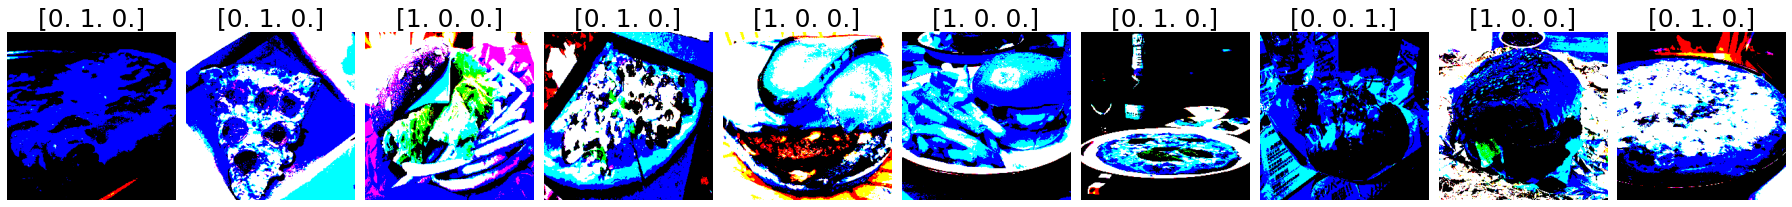

[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [21]:
plotImages(imgs)
print(labels)


#note
#[1. 0. 0.]  corresponds to hamburger 
#[0. 1. 0.]  corresponds pizza
#[0. 0. 1.]  corresponds to takoyaki

In [22]:
#kernel_size is the filter dimensions
model = Sequential(
    [
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(250, 250, 3)),
        MaxPool2D(pool_size = (2,2), strides = 2), 
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
        MaxPool2D(pool_size = (2,2), strides = 2), 
        Flatten(),
        Dense(units = 3, activation = 'softmax')
    ]
        )

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 3)                 7

In [24]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [25]:
model.fit(x = train_batches, validation_data = validate_batches, epochs = 10, verbose = 2)

Epoch 1/10
210/210 - 293s - loss: 18.5220 - accuracy: 0.4895 - val_loss: 3.7341 - val_accuracy: 0.5383 - 293s/epoch - 1s/step
Epoch 2/10
210/210 - 298s - loss: 1.0806 - accuracy: 0.7886 - val_loss: 2.4731 - val_accuracy: 0.5800 - 298s/epoch - 1s/step
Epoch 3/10
210/210 - 291s - loss: 0.1751 - accuracy: 0.9405 - val_loss: 2.1636 - val_accuracy: 0.5933 - 291s/epoch - 1s/step
Epoch 4/10
210/210 - 306s - loss: 0.0290 - accuracy: 0.9890 - val_loss: 2.1550 - val_accuracy: 0.5933 - 306s/epoch - 1s/step
Epoch 5/10
210/210 - 291s - loss: 0.0062 - accuracy: 0.9995 - val_loss: 2.1560 - val_accuracy: 0.6067 - 291s/epoch - 1s/step
Epoch 6/10
210/210 - 253s - loss: 0.0028 - accuracy: 1.0000 - val_loss: 2.1670 - val_accuracy: 0.5967 - 253s/epoch - 1s/step
Epoch 7/10
210/210 - 301s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.2310 - val_accuracy: 0.6000 - 301s/epoch - 1s/step
Epoch 8/10
210/210 - 305s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 2.2213 - val_accuracy: 0.6000 - 305s/epoch - 1s/step

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

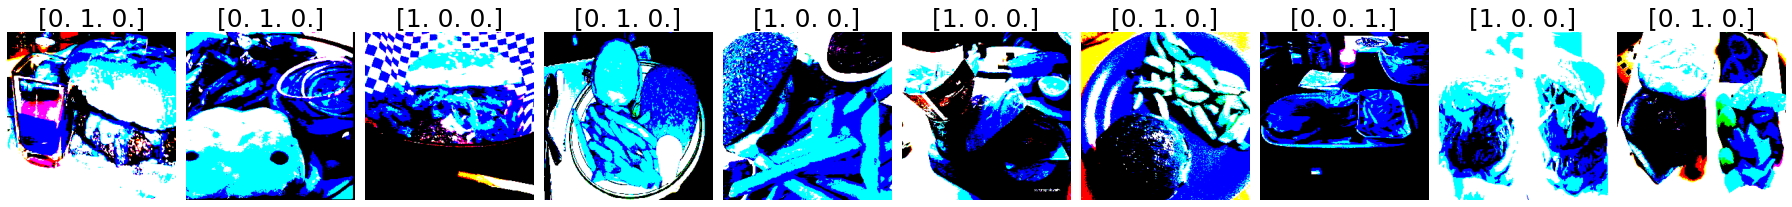

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [26]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [27]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
predictions = model.predict(x = test_batches, verbose = 1)

30/30 [==============================] - 18s 492ms/step


In [29]:
np.round(predictions)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0

In [30]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred = np.argmax(predictions, axis=-1))

In [31]:
#import itertools
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1) [:, np.newaxis]
    else:
        print('Confusion matrix, without normalize')
        
    print(cm)
    
    thresh = cm.max() / 3
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment = "center", color = "white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('predicted label')

In [32]:
test_batches.class_indices

{'hamburger': 0, 'pizza': 1, 'takoyaki': 2}

Confusion matrix, without normalize
[[61 19 20]
 [19 61 20]
 [20 32 48]]


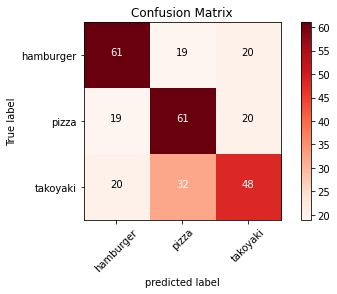

In [33]:
cm_plot_labels = ['hamburger', 'pizza', 'takoyaki' ]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
plt.savefig('confusion_matrix1.jpg')
plt.savefig('confusion_matrix1.png')

In [51]:
#save mmodel
# the architecture
#weights
#training configuration
#state of optimizezr
if os.path.isfile('C:/Jupyter_Experiments/ML/models/food_idenification_model.h5') is False:
    model.save('C:/Jupyter_Experiments/ML/models/food_idenification_model.h5')

In [36]:
#from tensorflow.keras.models import load_model
#saved_model = load_model('F:/Jupyter_Experiments/ML/models/food_idenification_model.h5')

In [37]:
#saved_model.summary()

In [35]:
#build a fine tuned vgg16 model
#dowmload model from the internet
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [90]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [91]:
new_model = Sequential()

for layer in vgg16_model.layers[:-1]:
    new_model.add(layer)

In [92]:
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [93]:
#def count_params(model):
#    non_trainable = np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_weight])
#params = count_params(new_model)
#assert params['non_trainable_params'] == 0
#assert params['trainable_params'] == 134260544

In [94]:
for layer in new_model.layers:
    layer.trainable = False

In [95]:
new_model.add(Dense(units = 3, activation = 'softmax'))

In [96]:
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [97]:
#train the fine tuned VGG16 model
new_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [98]:
new_model.fit(x = train_batches, validation_data = validate_batches, epochs = 5, verbose = 2)

Epoch 1/5
210/210 - 2597s - loss: 0.4449 - accuracy: 0.8300 - val_loss: 0.2820 - val_accuracy: 0.9083 - 2597s/epoch - 12s/step
Epoch 2/5
210/210 - 2219s - loss: 0.2153 - accuracy: 0.9267 - val_loss: 0.2397 - val_accuracy: 0.9117 - 2219s/epoch - 11s/step
Epoch 3/5
210/210 - 2455s - loss: 0.1688 - accuracy: 0.9448 - val_loss: 0.2209 - val_accuracy: 0.9233 - 2455s/epoch - 12s/step
Epoch 4/5
210/210 - 2336s - loss: 0.1404 - accuracy: 0.9543 - val_loss: 0.2114 - val_accuracy: 0.9317 - 2336s/epoch - 11s/step
Epoch 5/5
210/210 - 2497s - loss: 0.1194 - accuracy: 0.9652 - val_loss: 0.2069 - val_accuracy: 0.9283 - 2497s/epoch - 12s/step


In [108]:
predictions = new_model.predict(x = test_batches, verbose = 0)

In [109]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [110]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred = np.argmax(predictions, axis=-1))

In [111]:
test_batches.class_indices

{'hamburger': 0, 'pizza': 1, 'takoyaki': 2}

Confusion matrix, without normalize
[[89  1 10]
 [ 0 94  6]
 [ 0  3 97]]


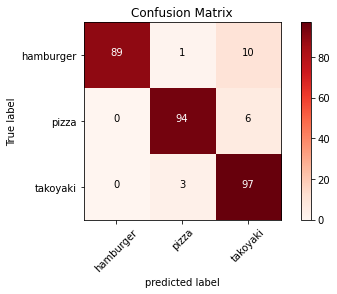

In [114]:
cm_plot_labels = ['hamburger', 'pizza', 'takoyaki']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
plt.savefig('confusion_matrix2.png')
plt.savefig('confusion_matrix2.jpg')